In [55]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from skimage.metrics import structural_similarity as ssim
from skimage import io
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluations

## NCU Statistics

In [3]:
# this code chunk reads the data from the 5 ncu csvs into a dataframe for each experiment 
# the id column distinguishes between the 5 repetitions of the experiment
# path to experiments folder
experiments_path = './experiments'

experiment_dataframes = {}

for experiment in os.listdir(experiments_path):
    experiment_folder = os.path.join(experiments_path, experiment)
    
    if os.path.isdir(experiment_folder):
        csv_files = [f for f in os.listdir(experiment_folder) if (f.endswith('.csv') and not f.endswith('gpu_memory.csv'))]
        
        dfs = []
        for csv_file in csv_files:
            file_path = os.path.join(experiment_folder, csv_file)
            df = pd.read_csv(file_path)
            dfs.append(df)
        
        experiment_dataframes[experiment] = pd.concat(dfs, ignore_index=True)

# display head of each experiment
for experiment, df in experiment_dataframes.items():
    print(f"\n{experiment} DataFrame:")
    display(df)


RayTracing_MAX_OCTREE_488_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,27125,RayTracing_MAX_OCTREE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.26,NaN,NaN,NaN,NaN,NaN
1,0,27125,RayTracing_MAX_OCTREE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.13,NaN,NaN,NaN,NaN,NaN
2,0,27125,RayTracing_MAX_OCTREE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3621,NaN,NaN,NaN,NaN,NaN
3,0,27125,RayTracing_MAX_OCTREE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,27125,RayTracing_MAX_OCTREE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,26533,RayTracing_MAX_OCTREE_488_02,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,26533,RayTracing_MAX_OCTREE_488_02,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,26533,RayTracing_MAX_OCTREE_488_02,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,26533,RayTracing_MAX_OCTREE_488_02,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_OCTREE_7748_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,29158,RayTracing_MAX_OCTREE_7748_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.42,NaN,NaN,NaN,NaN,NaN
1,0,29158,RayTracing_MAX_OCTREE_7748_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.14,NaN,NaN,NaN,NaN,NaN
2,0,29158,RayTracing_MAX_OCTREE_7748_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3636,NaN,NaN,NaN,NaN,NaN
3,0,29158,RayTracing_MAX_OCTREE_7748_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,29158,RayTracing_MAX_OCTREE_7748_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.27,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,27782,RayTracing_MAX_OCTREE_7748_01,127.0.0.1,"free_world(sphere (*)[7748], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,27782,RayTracing_MAX_OCTREE_7748_01,127.0.0.1,"free_world(sphere (*)[7748], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,27782,RayTracing_MAX_OCTREE_7748_01,127.0.0.1,"free_world(sphere (*)[7748], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,27782,RayTracing_MAX_OCTREE_7748_01,127.0.0.1,"free_world(sphere (*)[7748], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_BASELINE_1940_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,4323,RayTracing_MAX_BASELINE_1940_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.37,NaN,NaN,NaN,NaN,NaN
1,0,4323,RayTracing_MAX_BASELINE_1940_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.11,NaN,NaN,NaN,NaN,NaN
2,0,4323,RayTracing_MAX_BASELINE_1940_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3656,NaN,NaN,NaN,NaN,NaN
3,0,4323,RayTracing_MAX_BASELINE_1940_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,4323,RayTracing_MAX_BASELINE_1940_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,3355,RayTracing_MAX_BASELINE_1940_02,127.0.0.1,"free_world(sphere (*)[1940], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,3355,RayTracing_MAX_BASELINE_1940_02,127.0.0.1,"free_world(sphere (*)[1940], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,3355,RayTracing_MAX_BASELINE_1940_02,127.0.0.1,"free_world(sphere (*)[1940], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,3355,RayTracing_MAX_BASELINE_1940_02,127.0.0.1,"free_world(sphere (*)[1940], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_BASELINE_4360_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,12918,RayTracing_MAX_BASELINE_4360_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.62,NaN,NaN,NaN,NaN,NaN
1,0,12918,RayTracing_MAX_BASELINE_4360_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.15,NaN,NaN,NaN,NaN,NaN
2,0,12918,RayTracing_MAX_BASELINE_4360_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3784,NaN,NaN,NaN,NaN,NaN
3,0,12918,RayTracing_MAX_BASELINE_4360_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,12918,RayTracing_MAX_BASELINE_4360_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,12394,RayTracing_MAX_BASELINE_4360_02,127.0.0.1,"free_world(sphere (*)[4360], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,12394,RayTracing_MAX_BASELINE_4360_02,127.0.0.1,"free_world(sphere (*)[4360], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,12394,RayTracing_MAX_BASELINE_4360_02,127.0.0.1,"free_world(sphere (*)[4360], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,12394,RayTracing_MAX_BASELINE_4360_02,127.0.0.1,"free_world(sphere (*)[4360], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_BASELINE_3029_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,8491,RayTracing_MAX_BASELINE_3029_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.44,NaN,NaN,NaN,NaN,NaN
1,0,8491,RayTracing_MAX_BASELINE_3029_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.14,NaN,NaN,NaN,NaN,NaN
2,0,8491,RayTracing_MAX_BASELINE_3029_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3709,NaN,NaN,NaN,NaN,NaN
3,0,8491,RayTracing_MAX_BASELINE_3029_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,8491,RayTracing_MAX_BASELINE_3029_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,6792,RayTracing_MAX_BASELINE_3029_02,127.0.0.1,"free_world(sphere (*)[3029], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,6792,RayTracing_MAX_BASELINE_3029_02,127.0.0.1,"free_world(sphere (*)[3029], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,6792,RayTracing_MAX_BASELINE_3029_02,127.0.0.1,"free_world(sphere (*)[3029], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,6792,RayTracing_MAX_BASELINE_3029_02,127.0.0.1,"free_world(sphere (*)[3029], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_BASELINE_1093_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,426,RayTracing_MAX_BASELINE_1093_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.67,NaN,NaN,NaN,NaN,NaN
1,0,426,RayTracing_MAX_BASELINE_1093_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.15,NaN,NaN,NaN,NaN,NaN
2,0,426,RayTracing_MAX_BASELINE_1093_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3724,NaN,NaN,NaN,NaN,NaN
3,0,426,RayTracing_MAX_BASELINE_1093_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,426,RayTracing_MAX_BASELINE_1093_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,620,RayTracing_MAX_BASELINE_1093_01,127.0.0.1,"free_world(sphere (*)[1093], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,620,RayTracing_MAX_BASELINE_1093_01,127.0.0.1,"free_world(sphere (*)[1093], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,620,RayTracing_MAX_BASELINE_1093_01,127.0.0.1,"free_world(sphere (*)[1093], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,620,RayTracing_MAX_BASELINE_1093_01,127.0.0.1,"free_world(sphere (*)[1093], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracingFP16 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,14456,RayTracingFP16,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.49,NaN,NaN,NaN,NaN,NaN
1,0,14456,RayTracingFP16,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.13,NaN,NaN,NaN,NaN,NaN
2,0,14456,RayTracingFP16,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3621,NaN,NaN,NaN,NaN,NaN
3,0,14456,RayTracingFP16,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.50,NaN,NaN,NaN,NaN,NaN
4,0,14456,RayTracingFP16,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,4,15036,RayTracingFP16,127.0.0.1,"free_world(hitable **, hitable **, camera **)",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1196,4,15036,RayTracingFP16,127.0.0.1,"free_world(hitable **, hitable **, camera **)",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1197,4,15036,RayTracingFP16,127.0.0.1,"free_world(hitable **, hitable **, camera **)",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1198,4,15036,RayTracingFP16,127.0.0.1,"free_world(hitable **, hitable **, camera **)",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_OCTREE_4360_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,23100,RayTracing_MAX_OCTREE_4360_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.42,NaN,NaN,NaN,NaN,NaN
1,0,23100,RayTracing_MAX_OCTREE_4360_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.14,NaN,NaN,NaN,NaN,NaN
2,0,23100,RayTracing_MAX_OCTREE_4360_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3634,NaN,NaN,NaN,NaN,NaN
3,0,23100,RayTracing_MAX_OCTREE_4360_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,23100,RayTracing_MAX_OCTREE_4360_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.27,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,22200,RayTracing_MAX_OCTREE_4360_01,127.0.0.1,"free_world(sphere (*)[4360], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,22200,RayTracing_MAX_OCTREE_4360_01,127.0.0.1,"free_world(sphere (*)[4360], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,22200,RayTracing_MAX_OCTREE_4360_01,127.0.0.1,"free_world(sphere (*)[4360], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,22200,RayTracing_MAX_OCTREE_4360_01,127.0.0.1,"free_world(sphere (*)[4360], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracingBaseline DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,13857,RayTracingBaseline,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.57,NaN,NaN,NaN,NaN,NaN
1,0,13857,RayTracingBaseline,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.14,NaN,NaN,NaN,NaN,NaN
2,0,13857,RayTracingBaseline,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3629,NaN,NaN,NaN,NaN,NaN
3,0,13857,RayTracingBaseline,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,13857,RayTracingBaseline,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,13251,RayTracingBaseline,127.0.0.1,"free_world(hitable **, hitable **, camera **)",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,13251,RayTracingBaseline,127.0.0.1,"free_world(hitable **, hitable **, camera **)",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,13251,RayTracingBaseline,127.0.0.1,"free_world(hitable **, hitable **, camera **)",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,13251,RayTracingBaseline,127.0.0.1,"free_world(hitable **, hitable **, camera **)",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_OCTREE_3029_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,19695,RayTracing_MAX_OCTREE_3029_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.42,NaN,NaN,NaN,NaN,NaN
1,0,19695,RayTracing_MAX_OCTREE_3029_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.13,NaN,NaN,NaN,NaN,NaN
2,0,19695,RayTracing_MAX_OCTREE_3029_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3621,NaN,NaN,NaN,NaN,NaN
3,0,19695,RayTracing_MAX_OCTREE_3029_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,19695,RayTracing_MAX_OCTREE_3029_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,18930,RayTracing_MAX_OCTREE_3029_01,127.0.0.1,"free_world(sphere (*)[3029], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,18930,RayTracing_MAX_OCTREE_3029_01,127.0.0.1,"free_world(sphere (*)[3029], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,18930,RayTracing_MAX_OCTREE_3029_01,127.0.0.1,"free_world(sphere (*)[3029], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,18930,RayTracing_MAX_OCTREE_3029_01,127.0.0.1,"free_world(sphere (*)[3029], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_OCTREE_1093_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,15463,RayTracing_MAX_OCTREE_1093_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.52,NaN,NaN,NaN,NaN,NaN
1,0,15463,RayTracing_MAX_OCTREE_1093_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.13,NaN,NaN,NaN,NaN,NaN
2,0,15463,RayTracing_MAX_OCTREE_1093_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3677,NaN,NaN,NaN,NaN,NaN
3,0,15463,RayTracing_MAX_OCTREE_1093_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,15463,RayTracing_MAX_OCTREE_1093_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,16154,RayTracing_MAX_OCTREE_1093_02,127.0.0.1,"free_world(sphere (*)[1093], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,16154,RayTracing_MAX_OCTREE_1093_02,127.0.0.1,"free_world(sphere (*)[1093], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,16154,RayTracing_MAX_OCTREE_1093_02,127.0.0.1,"free_world(sphere (*)[1093], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,16154,RayTracing_MAX_OCTREE_1093_02,127.0.0.1,"free_world(sphere (*)[1093], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_BASELINE_7748_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,22340,RayTracing_MAX_BASELINE_7748_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.36,NaN,NaN,NaN,NaN,NaN
1,0,22340,RayTracing_MAX_BASELINE_7748_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.12,NaN,NaN,NaN,NaN,NaN
2,0,22340,RayTracing_MAX_BASELINE_7748_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3804,NaN,NaN,NaN,NaN,NaN
3,0,22340,RayTracing_MAX_BASELINE_7748_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.41,NaN,NaN,NaN,NaN,NaN
4,0,22340,RayTracing_MAX_BASELINE_7748_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,21632,RayTracing_MAX_BASELINE_7748_02,127.0.0.1,"free_world(sphere (*)[7748], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,21632,RayTracing_MAX_BASELINE_7748_02,127.0.0.1,"free_world(sphere (*)[7748], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,21632,RayTracing_MAX_BASELINE_7748_02,127.0.0.1,"free_world(sphere (*)[7748], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,21632,RayTracing_MAX_BASELINE_7748_02,127.0.0.1,"free_world(sphere (*)[7748], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_BASELINE_488_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,14828,RayTracing_MAX_BASELINE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.47,NaN,NaN,NaN,NaN,NaN
1,0,14828,RayTracing_MAX_BASELINE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.14,NaN,NaN,NaN,NaN,NaN
2,0,14828,RayTracing_MAX_BASELINE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3772,NaN,NaN,NaN,NaN,NaN
3,0,14828,RayTracing_MAX_BASELINE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,14828,RayTracing_MAX_BASELINE_488_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,15532,RayTracing_MAX_BASELINE_488_02,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,15532,RayTracing_MAX_BASELINE_488_02,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,15532,RayTracing_MAX_BASELINE_488_02,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,15532,RayTracing_MAX_BASELINE_488_02,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_OCTREE_1940_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,17258,RayTracing_MAX_OCTREE_1940_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.57,NaN,NaN,NaN,NaN,NaN
1,0,17258,RayTracing_MAX_OCTREE_1940_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.16,NaN,NaN,NaN,NaN,NaN
2,0,17258,RayTracing_MAX_OCTREE_1940_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3658,NaN,NaN,NaN,NaN,NaN
3,0,17258,RayTracing_MAX_OCTREE_1940_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,17258,RayTracing_MAX_OCTREE_1940_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.27,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,16384,RayTracing_MAX_OCTREE_1940_01,127.0.0.1,"free_world(sphere (*)[1940], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,16384,RayTracing_MAX_OCTREE_1940_01,127.0.0.1,"free_world(sphere (*)[1940], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,16384,RayTracing_MAX_OCTREE_1940_01,127.0.0.1,"free_world(sphere (*)[1940], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,16384,RayTracing_MAX_OCTREE_1940_01,127.0.0.1,"free_world(sphere (*)[1940], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_OCTREE_488_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,25960,RayTracing_MAX_OCTREE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.52,NaN,NaN,NaN,NaN,NaN
1,0,25960,RayTracing_MAX_OCTREE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.14,NaN,NaN,NaN,NaN,NaN
2,0,25960,RayTracing_MAX_OCTREE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3702,NaN,NaN,NaN,NaN,NaN
3,0,25960,RayTracing_MAX_OCTREE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.48,NaN,NaN,NaN,NaN,NaN
4,0,25960,RayTracing_MAX_OCTREE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,25770,RayTracing_MAX_OCTREE_488_01,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,25770,RayTracing_MAX_OCTREE_488_01,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,25770,RayTracing_MAX_OCTREE_488_01,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,25770,RayTracing_MAX_OCTREE_488_01,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_BASELINE_1940_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,3094,RayTracing_MAX_BASELINE_1940_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.60,NaN,NaN,NaN,NaN,NaN
1,0,3094,RayTracing_MAX_BASELINE_1940_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.16,NaN,NaN,NaN,NaN,NaN
2,0,3094,RayTracing_MAX_BASELINE_1940_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3950,NaN,NaN,NaN,NaN,NaN
3,0,3094,RayTracing_MAX_BASELINE_1940_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.40,NaN,NaN,NaN,NaN,NaN
4,0,3094,RayTracing_MAX_BASELINE_1940_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.24,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,2052,RayTracing_MAX_BASELINE_1940_01,127.0.0.1,"free_world(sphere (*)[1940], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,2052,RayTracing_MAX_BASELINE_1940_01,127.0.0.1,"free_world(sphere (*)[1940], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,2052,RayTracing_MAX_BASELINE_1940_01,127.0.0.1,"free_world(sphere (*)[1940], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,2052,RayTracing_MAX_BASELINE_1940_01,127.0.0.1,"free_world(sphere (*)[1940], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_OCTREE_7748_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,31355,RayTracing_MAX_OCTREE_7748_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.49,NaN,NaN,NaN,NaN,NaN
1,0,31355,RayTracing_MAX_OCTREE_7748_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.14,NaN,NaN,NaN,NaN,NaN
2,0,31355,RayTracing_MAX_OCTREE_7748_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3635,NaN,NaN,NaN,NaN,NaN
3,0,31355,RayTracing_MAX_OCTREE_7748_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,1.30,NaN,NaN,NaN,NaN,NaN
4,0,31355,RayTracing_MAX_OCTREE_7748_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.27,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,30777,RayTracing_MAX_OCTREE_7748_02,127.0.0.1,"free_world(sphere (*)[7748], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,30777,RayTracing_MAX_OCTREE_7748_02,127.0.0.1,"free_world(sphere (*)[7748], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,30777,RayTracing_MAX_OCTREE_7748_02,127.0.0.1,"free_world(sphere (*)[7748], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,30777,RayTracing_MAX_OCTREE_7748_02,127.0.0.1,"free_world(sphere (*)[7748], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_BASELINE_4360_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,10856,RayTracing_MAX_BASELINE_4360_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.52,NaN,NaN,NaN,NaN,NaN
1,0,10856,RayTracing_MAX_BASELINE_4360_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.15,NaN,NaN,NaN,NaN,NaN
2,0,10856,RayTracing_MAX_BASELINE_4360_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3713,NaN,NaN,NaN,NaN,NaN
3,0,10856,RayTracing_MAX_BASELINE_4360_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,10856,RayTracing_MAX_BASELINE_4360_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,9404,RayTracing_MAX_BASELINE_4360_01,127.0.0.1,"free_world(sphere (*)[4360], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,9404,RayTracing_MAX_BASELINE_4360_01,127.0.0.1,"free_world(sphere (*)[4360], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,9404,RayTracing_MAX_BASELINE_4360_01,127.0.0.1,"free_world(sphere (*)[4360], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,9404,RayTracing_MAX_BASELINE_4360_01,127.0.0.1,"free_world(sphere (*)[4360], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_BASELINE_1093_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,1217,RayTracing_MAX_BASELINE_1093_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.49,NaN,NaN,NaN,NaN,NaN
1,0,1217,RayTracing_MAX_BASELINE_1093_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.14,NaN,NaN,NaN,NaN,NaN
2,0,1217,RayTracing_MAX_BASELINE_1093_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3629,NaN,NaN,NaN,NaN,NaN
3,0,1217,RayTracing_MAX_BASELINE_1093_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,1217,RayTracing_MAX_BASELINE_1093_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,1843,RayTracing_MAX_BASELINE_1093_02,127.0.0.1,"free_world(sphere (*)[1093], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,1843,RayTracing_MAX_BASELINE_1093_02,127.0.0.1,"free_world(sphere (*)[1093], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,1843,RayTracing_MAX_BASELINE_1093_02,127.0.0.1,"free_world(sphere (*)[1093], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,1843,RayTracing_MAX_BASELINE_1093_02,127.0.0.1,"free_world(sphere (*)[1093], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_BASELINE_3029_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,6062,RayTracing_MAX_BASELINE_3029_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.64,NaN,NaN,NaN,NaN,NaN
1,0,6062,RayTracing_MAX_BASELINE_3029_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.18,NaN,NaN,NaN,NaN,NaN
2,0,6062,RayTracing_MAX_BASELINE_3029_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3694,NaN,NaN,NaN,NaN,NaN
3,0,6062,RayTracing_MAX_BASELINE_3029_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.49,NaN,NaN,NaN,NaN,NaN
4,0,6062,RayTracing_MAX_BASELINE_3029_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,4969,RayTracing_MAX_BASELINE_3029_01,127.0.0.1,"free_world(sphere (*)[3029], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,4969,RayTracing_MAX_BASELINE_3029_01,127.0.0.1,"free_world(sphere (*)[3029], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,4969,RayTracing_MAX_BASELINE_3029_01,127.0.0.1,"free_world(sphere (*)[3029], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,4969,RayTracing_MAX_BASELINE_3029_01,127.0.0.1,"free_world(sphere (*)[3029], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_OCTREE_4360_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,24597,RayTracing_MAX_OCTREE_4360_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.42,NaN,NaN,NaN,NaN,NaN
1,0,24597,RayTracing_MAX_OCTREE_4360_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.15,NaN,NaN,NaN,NaN,NaN
2,0,24597,RayTracing_MAX_OCTREE_4360_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3653,NaN,NaN,NaN,NaN,NaN
3,0,24597,RayTracing_MAX_OCTREE_4360_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,24597,RayTracing_MAX_OCTREE_4360_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,24199,RayTracing_MAX_OCTREE_4360_02,127.0.0.1,"free_world(sphere (*)[4360], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,24199,RayTracing_MAX_OCTREE_4360_02,127.0.0.1,"free_world(sphere (*)[4360], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,24199,RayTracing_MAX_OCTREE_4360_02,127.0.0.1,"free_world(sphere (*)[4360], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,24199,RayTracing_MAX_OCTREE_4360_02,127.0.0.1,"free_world(sphere (*)[4360], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_OCTREE_1093_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,12656,RayTracing_MAX_OCTREE_1093_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.34,NaN,NaN,NaN,NaN,NaN
1,0,12656,RayTracing_MAX_OCTREE_1093_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.12,NaN,NaN,NaN,NaN,NaN
2,0,12656,RayTracing_MAX_OCTREE_1093_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3609,NaN,NaN,NaN,NaN,NaN
3,0,12656,RayTracing_MAX_OCTREE_1093_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.50,NaN,NaN,NaN,NaN,NaN
4,0,12656,RayTracing_MAX_OCTREE_1093_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.27,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,12854,RayTracing_MAX_OCTREE_1093_01,127.0.0.1,"free_world(sphere (*)[1093], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,12854,RayTracing_MAX_OCTREE_1093_01,127.0.0.1,"free_world(sphere (*)[1093], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,12854,RayTracing_MAX_OCTREE_1093_01,127.0.0.1,"free_world(sphere (*)[1093], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,12854,RayTracing_MAX_OCTREE_1093_01,127.0.0.1,"free_world(sphere (*)[1093], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_OCTREE_3029_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,21557,RayTracing_MAX_OCTREE_3029_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.42,NaN,NaN,NaN,NaN,NaN
1,0,21557,RayTracing_MAX_OCTREE_3029_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.12,NaN,NaN,NaN,NaN,NaN
2,0,21557,RayTracing_MAX_OCTREE_3029_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3603,NaN,NaN,NaN,NaN,NaN
3,0,21557,RayTracing_MAX_OCTREE_3029_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.44,NaN,NaN,NaN,NaN,NaN
4,0,21557,RayTracing_MAX_OCTREE_3029_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,20203,RayTracing_MAX_OCTREE_3029_02,127.0.0.1,"free_world(sphere (*)[3029], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,20203,RayTracing_MAX_OCTREE_3029_02,127.0.0.1,"free_world(sphere (*)[3029], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,20203,RayTracing_MAX_OCTREE_3029_02,127.0.0.1,"free_world(sphere (*)[3029], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,20203,RayTracing_MAX_OCTREE_3029_02,127.0.0.1,"free_world(sphere (*)[3029], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_OCTREE_1940_02 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,18349,RayTracing_MAX_OCTREE_1940_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.49,NaN,NaN,NaN,NaN,NaN
1,0,18349,RayTracing_MAX_OCTREE_1940_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.16,NaN,NaN,NaN,NaN,NaN
2,0,18349,RayTracing_MAX_OCTREE_1940_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3658,NaN,NaN,NaN,NaN,NaN
3,0,18349,RayTracing_MAX_OCTREE_1940_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.43,NaN,NaN,NaN,NaN,NaN
4,0,18349,RayTracing_MAX_OCTREE_1940_02,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.26,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,17478,RayTracing_MAX_OCTREE_1940_02,127.0.0.1,"free_world(sphere (*)[1940], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,17478,RayTracing_MAX_OCTREE_1940_02,127.0.0.1,"free_world(sphere (*)[1940], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,17478,RayTracing_MAX_OCTREE_1940_02,127.0.0.1,"free_world(sphere (*)[1940], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,17478,RayTracing_MAX_OCTREE_1940_02,127.0.0.1,"free_world(sphere (*)[1940], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_BASELINE_7748_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,19315,RayTracing_MAX_BASELINE_7748_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.47,NaN,NaN,NaN,NaN,NaN
1,0,19315,RayTracing_MAX_BASELINE_7748_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.14,NaN,NaN,NaN,NaN,NaN
2,0,19315,RayTracing_MAX_BASELINE_7748_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3772,NaN,NaN,NaN,NaN,NaN
3,0,19315,RayTracing_MAX_BASELINE_7748_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,19315,RayTracing_MAX_BASELINE_7748_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,16611,RayTracing_MAX_BASELINE_7748_01,127.0.0.1,"free_world(sphere (*)[7748], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,16611,RayTracing_MAX_BASELINE_7748_01,127.0.0.1,"free_world(sphere (*)[7748], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,16611,RayTracing_MAX_BASELINE_7748_01,127.0.0.1,"free_world(sphere (*)[7748], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,16611,RayTracing_MAX_BASELINE_7748_01,127.0.0.1,"free_world(sphere (*)[7748], hitable **, camer...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83



RayTracing_MAX_BASELINE_488_01 DataFrame:


,ID,Process ID,Process Name,Host Name,Kernel Name,Context,Stream,Block Size,Grid Size,Device,CC,Section Name,Metric Name,Metric Unit,Metric Value,Rule Name,Rule Type,Rule Description,Estimated Speedup Type,Estimated Speedup
0,0,13967,RayTracing_MAX_BASELINE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Frequency,Ghz,10.67,NaN,NaN,NaN,NaN,NaN
1,0,13967,RayTracing_MAX_BASELINE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,SM Frequency,Ghz,2.17,NaN,NaN,NaN,NaN,NaN
2,0,13967,RayTracing_MAX_BASELINE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Elapsed Cycles,cycle,3751,NaN,NaN,NaN,NaN,NaN
3,0,13967,RayTracing_MAX_BASELINE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,Memory Throughput,%,0.42,NaN,NaN,NaN,NaN,NaN
4,0,13967,RayTracing_MAX_BASELINE_488_01,127.0.0.1,rand_init(curandStateXORWOW *),1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,GPU Speed Of Light Throughput,DRAM Throughput,%,0.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,4,14483,RayTracing_MAX_BASELINE_488_01,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Theoretical Occupancy,%,50,NaN,NaN,NaN,NaN,NaN
1191,4,14483,RayTracing_MAX_BASELINE_488_01,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Occupancy,%,2.08,NaN,NaN,NaN,NaN,NaN
1192,4,14483,RayTracing_MAX_BASELINE_488_01,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,Achieved Active Warps Per SM,warp,1,NaN,NaN,NaN,NaN,NaN
1193,4,14483,RayTracing_MAX_BASELINE_488_01,127.0.0.1,"free_world(sphere (*)[488], hitable **, camera...",1,7,"(1, 1, 1)","(1, 1, 1)",0,8.9,Occupancy,NaN,NaN,NaN,AchievedOccupancy,OPT,The difference between calculated theoretical ...,local,95.83


In [27]:
# here the repetitions of each experiment will be combined
# the values of metrics_to_average will be averaged and stored in a new data frame
# alongside with other important information like number of spheres, sphere radius, baseline T/F, kernel_name
# metrics to calculate averages for
metrics_to_average = ["Memory Throughput", "Duration", "Theoretical Occupancy", "Achieved Occupancy"]

result_data = []

for experiment, df in experiment_dataframes.items():
    # extract NUM_SPHERES and SPHERE_RADIUS from experiment name
    parts = experiment.split('_')
    numbers = [p for p in parts if p.isdigit()]
    
    if len(numbers) == 2:
        num_spheres = int(numbers[0])
        sphere_radius = int(numbers[1])/10
    else:
        num_spheres = 488
        sphere_radius = 0.2
    
    is_baseline = 'BASELINE' in experiment
    
    for kernel_name in df['Kernel Name'].unique():
        filtered_df = df[df['Kernel Name'] == kernel_name]
        kernel_name = kernel_name.split('(')[0] 
        
        for metric in metrics_to_average:
            metric_values = filtered_df[filtered_df['Metric Name'] == metric][['Metric Value', 'Metric Unit']]
            metric_values['Metric Value'] = pd.to_numeric(metric_values['Metric Value'], errors='coerce').dropna()

            # convert all durations to milliseconds
            metric_values.loc[metric_values['Metric Unit'] == 's', 'Metric Value'] *= 1000
            metric_values.loc[metric_values['Metric Unit'] == 'us', 'Metric Value'] /= 1000
            
            if not metric_values['Metric Value'].empty:
                avg_value = metric_values['Metric Value'].mean()
                result_data.append({
                    'experiment_name': experiment,
                    'kernel_name': kernel_name,
                    'metric_name': metric,
                    'avg': avg_value,
                    'NUM_SPHERES': num_spheres,
                    'SPHERE_RADIUS': sphere_radius,
                    'BASELINE': is_baseline
                })

result_df = pd.DataFrame(result_data)

# display all duration values
print(result_df[result_df['metric_name'] == 'Duration'])

                    experiment_name   kernel_name metric_name         avg  \
1      RayTracing_MAX_OCTREE_488_02     rand_init    Duration    0.001732   
5      RayTracing_MAX_OCTREE_488_02  create_world    Duration    5.550000   
9      RayTracing_MAX_OCTREE_488_02   render_init    Duration    0.109498   
13     RayTracing_MAX_OCTREE_488_02        render    Duration  323.074000   
17     RayTracing_MAX_OCTREE_488_02    free_world    Duration    4.920000   
..                              ...           ...         ...         ...   
501  RayTracing_MAX_BASELINE_488_01     rand_init    Duration    0.001754   
505  RayTracing_MAX_BASELINE_488_01  create_world    Duration    5.570000   
509  RayTracing_MAX_BASELINE_488_01   render_init    Duration    0.109876   
513  RayTracing_MAX_BASELINE_488_01        render    Duration   79.690000   
517  RayTracing_MAX_BASELINE_488_01    free_world    Duration    4.940000   

     NUM_SPHERES  SPHERE_RADIUS  BASELINE  
1            488            0.2

## Reason for focusing on render kernel

It dominates the runtime.

<Figure size 1200x800 with 0 Axes>

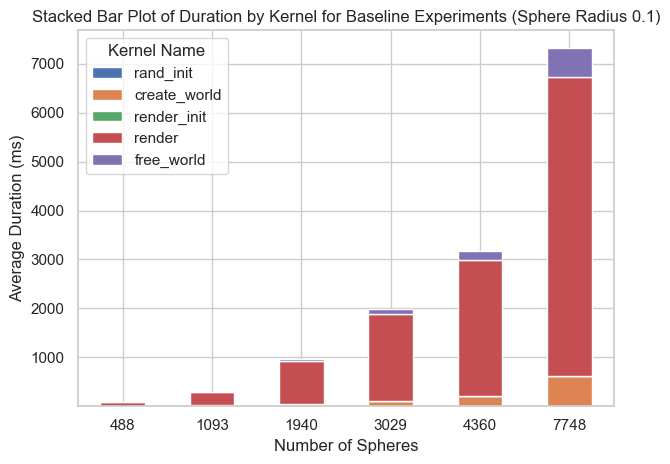

In [63]:
baseline_df = result_df[(result_df['BASELINE'] == True) & 
                        (result_df['metric_name'] == 'Duration') & 
                        (result_df['SPHERE_RADIUS'] == 0.1)]

# define kernel stacking order
kernel_order = ['rand_init', 'create_world', 'render_init', 'render', 'free_world']

pivot_df = baseline_df.pivot(index='NUM_SPHERES', columns='kernel_name', values='avg')

pivot_df = pivot_df[kernel_order]

plt.figure(figsize=(12, 8))
pivot_df.plot(kind='bar', stacked=True)

plt.title('Stacked Bar Plot of Duration by Kernel for Baseline Experiments (Sphere Radius 0.1)')
plt.ylabel('Average Duration (ms)')
plt.xlabel('Number of Spheres')
plt.xticks(rotation=0)
plt.legend(title='Kernel Name')
plt.tight_layout()
plt.show()

## Compare original baselines with half precision

### Runtime Comparsion

Speedup trough Half Precision: 1.329x


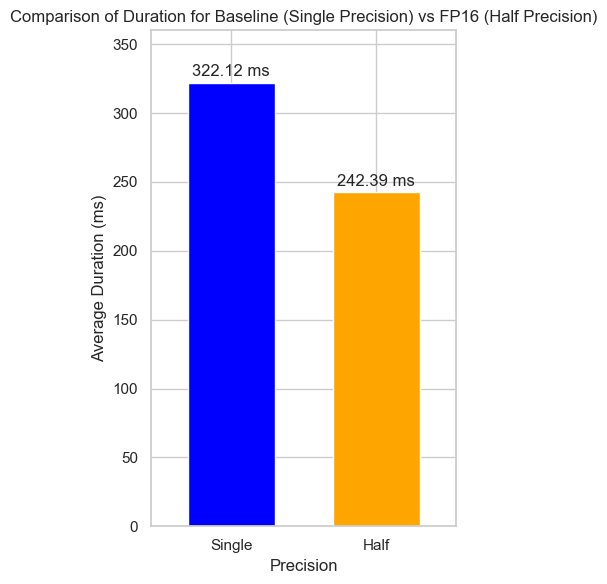

In [65]:
filtered_df = result_df[(result_df['experiment_name'].isin(['RayTracingBaseline', 'RayTracingFP16'])) &
                        (result_df['kernel_name'] == 'render') &
                        (result_df['metric_name'] == 'Duration')]

bar_data = filtered_df.groupby('experiment_name')['avg'].mean()

speedup = bar_data['RayTracingBaseline'] / bar_data['RayTracingFP16']
print(f"Speedup trough Half Precision: {speedup:.3f}x")

plt.figure(figsize=(4, 6))
ax = bar_data.plot(kind='bar', color=['blue', 'orange'], width=0.6)

for i, value in enumerate(bar_data):
    ax.text(i, value + 5, f'{value:.2f} ms', ha='center')

plt.title('Comparison of Duration for Baseline (Single Precision) vs FP16 (Half Precision)')
plt.ylabel('Average Duration (ms)')
plt.xlabel("Precision")
plt.xticks(ticks=[0, 1], labels=['Single', 'Half'], rotation=0)
plt.tight_layout()
plt.ylim(0,360)
plt.show()

### Image Quaality Comparison

In [43]:
def load_ppm_image(path):
    image = io.imread(path)
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


def calculate_metrics(img1, img2):
    ssim_value, _ = ssim(img1, img2, full=True)
    psnr_value = cv2.PSNR(img1, img2)
    return ssim_value, psnr_value


def compare_experiment_images(experiments_folder):
    experiment_images = {}

    # Collect first images from each experiment
    for subfolder in os.listdir(experiments_folder):
        subfolder_path = os.path.join(experiments_folder, subfolder)
        if os.path.isdir(subfolder_path):
            images = sorted([f for f in os.listdir(subfolder_path) if f.endswith('_1.ppm')])
            if images:
                image_path = os.path.join(subfolder_path, images[0])
                experiment_images[subfolder] = load_ppm_image(image_path)

    # Perform comparisons
    results = []
    experiment_names = list(experiment_images.keys())

    for i in range(len(experiment_names)):
        for j in range(i + 1, len(experiment_names)):
            exp1, exp2 = experiment_names[i], experiment_names[j]
            img1, img2 = experiment_images[exp1], experiment_images[exp2]
            ssim_value, psnr_value = calculate_metrics(img1, img2)
            results.append({
                'Experiment 1': exp1,
                'Experiment 2': exp2,
                'SSIM': ssim_value,
                'PSNR': psnr_value
            })

    # Save results to CSV
    results_df = pd.DataFrame(results)
    results_df.to_csv('comparison_results.csv', index=False)
    print("Comparison complete. Results saved to 'comparison_results.csv'.")
    return results_df

image_comp_result = compare_experiment_images("experiments")
image_comp_result

Comparison complete. Results saved to 'comparison_results.csv'.


,Experiment 1,Experiment 2,SSIM,PSNR
0,RayTracing_MAX_OCTREE_488_02,RayTracing_MAX_OCTREE_7748_01,0.488889,14.827480
1,RayTracing_MAX_OCTREE_488_02,RayTracing_MAX_BASELINE_1940_02,0.511476,14.130421
2,RayTracing_MAX_OCTREE_488_02,RayTracing_MAX_BASELINE_4360_02,0.522213,15.201173
3,RayTracing_MAX_OCTREE_488_02,RayTracing_MAX_BASELINE_3029_02,0.518084,14.443989
4,RayTracing_MAX_OCTREE_488_02,RayTracing_MAX_BASELINE_1093_01,0.564228,16.373901
...,...,...,...,...
320,RayTracing_MAX_OCTREE_3029_02,RayTracing_MAX_BASELINE_7748_01,0.477803,15.175794
321,RayTracing_MAX_OCTREE_3029_02,RayTracing_MAX_BASELINE_488_01,0.546183,14.059760
322,RayTracing_MAX_OCTREE_1940_02,RayTracing_MAX_BASELINE_7748_01,0.477276,15.493928
323,RayTracing_MAX_OCTREE_1940_02,RayTracing_MAX_BASELINE_488_01,0.536464,13.595790


In [47]:
image_comp_result[(image_comp_result['Experiment 2'] == "RayTracingBaseline") & (image_comp_result['Experiment 1'] == "RayTracingFP16")]

,Experiment 1,Experiment 2,SSIM,PSNR
136,RayTracingFP16,RayTracingBaseline,0.431671,12.445738


SSIM Interpretation:
The SSIM value of 0.4317 indicates moderate dissimilarity between EXP_COLAB_FP16 and EXP_COLAB_BASELINE. SSIM ranges from -1 to 1, where 1 represents identical images. A value below 0.5 suggests noticeable structural differences, likely caused by variations in rendering precision or artifacts introduced by using FP16 computations.

PSNR Interpretation:
The PSNR of 12.44 dB reflects significant distortion or loss of quality. Higher PSNR values (above 30 dB) indicate better similarity, while values below 20 dB suggest visible degradation. The lower PSNR here highlights the impact of reduced precision, potentially resulting in compression artifacts or increased noise in the FP16 experiment.

TODO: remove

## Improvement through OCTREE

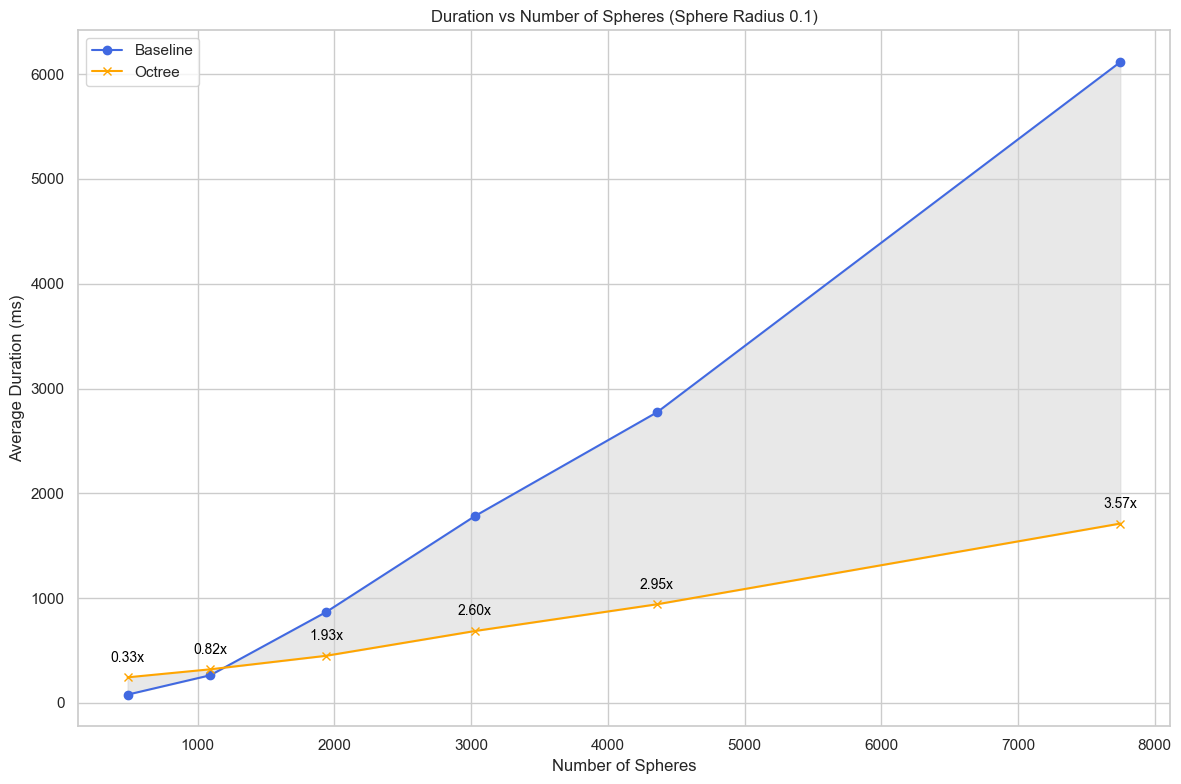

   NUM_SPHERES   Speedup
0          488  0.325608
1         1093  0.823669
2         1940  1.926718
3         3029  2.597569
4         4360  2.945436
5         7748  3.572430


In [66]:
# Filter DataFrame for experiments with sphere_radius = 0.1, excluding RayTracingBaseline and RayTracingFP16
filtered_df = result_df[(result_df['SPHERE_RADIUS'] == 0.1) &
                        (~result_df['experiment_name'].isin(['RayTracingBaseline', 'RayTracingFP16'])) &
                        (result_df['kernel_name'] == 'render') &
                        (result_df['metric_name'] == 'Duration')]

# Separate baseline and octree experiments
baseline_df = filtered_df[filtered_df['BASELINE'] == True]
octree_df = filtered_df[filtered_df['BASELINE'] == False]

# Group by number of spheres and calculate mean duration
baseline_plot = baseline_df.groupby('NUM_SPHERES')['avg'].mean()
octree_plot = octree_df.groupby('NUM_SPHERES')['avg'].mean()

# Calculate speedup
speedup = (baseline_plot / octree_plot).reset_index()
speedup.columns = ['NUM_SPHERES', 'Speedup']

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

plt.plot(baseline_plot.index, baseline_plot.values, marker='o', label='Baseline', color='royalblue')
plt.plot(octree_plot.index, octree_plot.values, marker='x', label='Octree', color='orange')
plt.fill_between(baseline_plot.index, octree_plot.values, baseline_plot.values, color='lightgray', alpha=0.5)

# Annotate speedup values
for i, row in speedup.iterrows():
    plt.text(row['NUM_SPHERES'], octree_plot[row['NUM_SPHERES']] + 150,  # Shift upwards
             f"{row['Speedup']:.2f}x", ha='center', fontsize=10, color='black')  # Change color to black

plt.title('Duration vs Number of Spheres (Sphere Radius 0.1)')
plt.xlabel('Number of Spheres')
plt.ylabel('Average Duration (ms)')
plt.legend()
plt.tight_layout()
plt.show()

# Display speedup DataFrame
print(speedup)

## Significance Test for Duration

In [6]:
# Perform ANOVA for Duration
duration_data = {}

for experiment, df in experiment_dataframes.items():
    filtered_df = df[(df['Metric Name'] == 'Duration') & df['Kernel Name'].str.startswith('render(')]
    durations = pd.to_numeric(filtered_df['Metric Value'], errors='coerce').dropna()
    duration_data[experiment] = durations

anova_result = stats.f_oneway(*duration_data.values())
print(f"ANOVA p-value for Duration: {anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("Significant differences exist in Duration between experiments.")
else:
    print("No significant difference in Duration between experiments.")


ANOVA p-value for Duration: 3.901491956616292e-178
Significant differences exist in Duration between experiments.
